## ***HEART DISEASE DIAGONSIS***


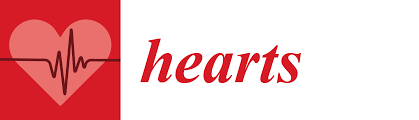

The term “heart disease” refers to several types of heart conditions. The most common type of heart disease is coronary artery disease (CAD), which affects the blood flow to the heart. Decreased blood flow can cause a heart attack. Sometimes heart disease may be “silent” and not diagnosed until a person experiences signs or symptoms of a heart attack, heart failure, or an arrhythmia.
India has one of the highest burdens of cardiovascular disease (CVD) worldwide. The annual number of deaths from CVD in India is projected to rise from 2.26 million (1990) to 4.77 million (2020). Coronary heart disease prevalence rates in India have been estimated over the past several decades and have ranged from 1.6% to 7.4% in rural populations and from 1% to 13.2% in urban populations. Statistics shows One person dies every 40 seconds in the United States from cardiovascular disease. So it becomes very important to study on this matter and take out some meaningful insights from the data for prevention and cure for Heart Diseases.


***IMPORTING*** ***LIBRARIES***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import seaborn as sns

***READING*** ***DATASET***

In [2]:
df=pd.read_csv('heart_disease_dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


***INFORMATION*** ***ABOUT*** ***ATTRIBUTES*** 
1. age (Age in years)
2. sex : (1 = male, 0 = female)
3. cp (Chest Pain Type): 
   *   asymptomatic, 
   *   atypical angina
   *   non-anginal 
4. trestbps (Resting Blood Pressure in mm/hg )
5. chol (Serum Cholesterol in mg/dl)
6. fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
7. restecg (Resting ECG): 
   * showing probable or definite left ventricular hypertrophy by Estes’ criteria
   *   normal
   * having ST-T wave abnormality
8. thalach (maximum heart rate achieved)
9. exang (Exercise Induced Angina): [1 = yes, 0 = no]
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]
12. ca [number of major vessels (0–3)
13. thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
14. target: [0 = disease, 1 = no disease]

***PANDAS*** ***PROFILE*** ***REPORT***

In [6]:
pf=ProfileReport(df)

In [111]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           2
dtype: int64

CHECKING UNIQUE VALUES IN CA

In [8]:
df['ca'].unique()

array([      0,       3,       2,       1, -100000], dtype=int64)

In [9]:
df.ca.value_counts()

 0         176
 1          65
 2          38
 3          20
-100000      4
Name: ca, dtype: int64

In [10]:
df[df['ca']==-100000]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,-100000,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,-100000,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,-100000,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0


Changing 4th Value to NAN as according to information we only have 4 ca values

In [11]:
df.loc[df['ca']==-100000,'ca']=np.NaN

In [12]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [13]:
df['thal'].unique()

array([      6,       3,       7, -100000], dtype=int64)

#same as in ca in thal we have 4 values but according to given information we have 3 so changing it to nan

In [14]:
df[df['thal']==-100000]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,-100000,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,-100000,1


In [15]:
df.loc[df['thal']==-100000,'thal']=np.NaN

In [16]:
df['thal'].unique()

array([ 6.,  3.,  7., nan])

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

as we changed in ca and thal invalid values to nan we now we have to remove null values so now replacing it by median values

In [18]:
df=df.fillna(df.median())

In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [20]:
df['thal'].unique()

array([6., 3., 7.])

In [21]:
df['cp'].unique()

array([1, 4, 3, 2], dtype=int64)

### ***HERE WE ARE CHANGING NUMERICAL VARIABLES INTO CATEGORICAL VALUES FOR EASY VISUALIZATION***

In [22]:
df['num'] = df.num.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})
df['slope'] = df.slope.replace({1: "upsloping", 2: "flat",3:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

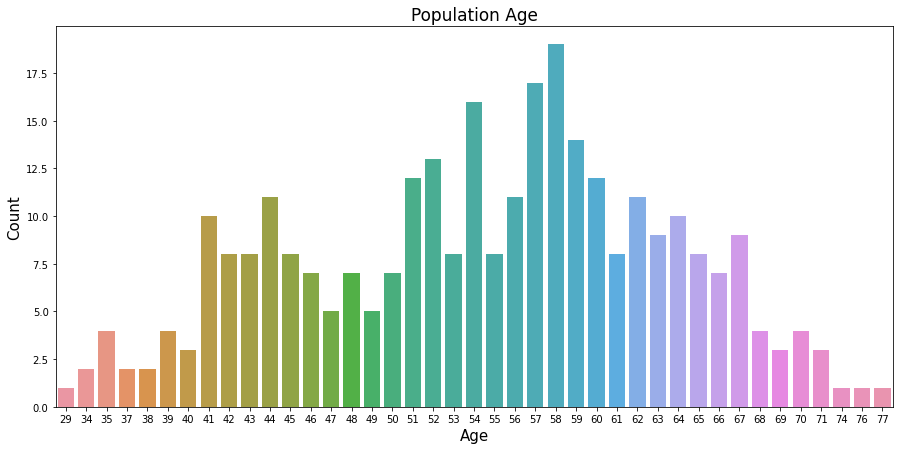

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=df)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### ***It is seen that age plays an important role when it comes to heart diseases specifically so categorizing ages into young and elder people***

In [24]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.663366
std,9.038662,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.934375
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [25]:
Young=df[(df['age']>=29) & (df['age']<50)]
Elderly=df[(df['age']>=50)]
print('Young =',len(Young))
print('Elderly =',len(Elderly))

Young = 87
Elderly = 216


In [26]:
def age_range(row):
    if row>=29 and row<50:
        return 'Young'
    elif row>=50:
        return 'Elder'

In [27]:
df['Age_Range']=df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Age_Range
0,63,Male,typical_angina,145,233,1,2,150,0,2.3,downsloping,0.0,6.0,No_disease,Elder
1,67,Male,asymtomatic,160,286,0,2,108,1,1.5,flat,3.0,normal,Disease,Elder
2,67,Male,asymtomatic,120,229,0,2,129,1,2.6,flat,2.0,7.0,Disease,Elder
3,37,Male,non-anginal pain,130,250,0,0,187,0,3.5,downsloping,0.0,normal,No_disease,Young
4,41,Female,atypical_angina,130,204,0,2,172,0,1.4,upsloping,0.0,normal,No_disease,Young


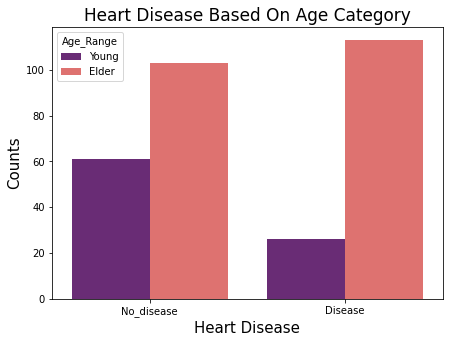

In [28]:
plt.figure(figsize=(7,5))
hue_order=['Young', 'Elder']
sns.countplot(x='num', hue='Age_Range', data=df, hue_order=hue_order, palette='magma')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

<AxesSubplot:xlabel='num', ylabel='oldpeak'>

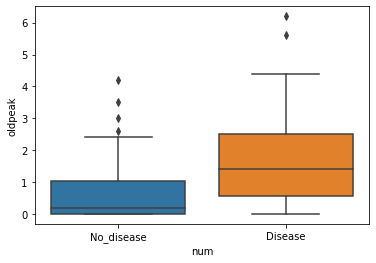

In [29]:
sns.boxplot(x='num', y='oldpeak', data=df)

<AxesSubplot:xlabel='num', ylabel='age'>

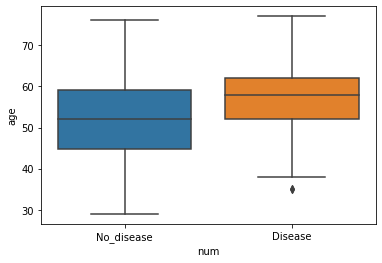

In [30]:
sns.boxplot(x='num', y='age', data=df)

<AxesSubplot:xlabel='num', ylabel='trestbps'>

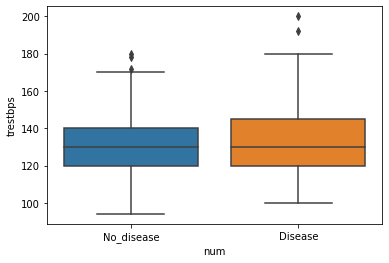

In [31]:
sns.boxplot(x='num', y='trestbps', data=df)

<AxesSubplot:xlabel='num', ylabel='chol'>

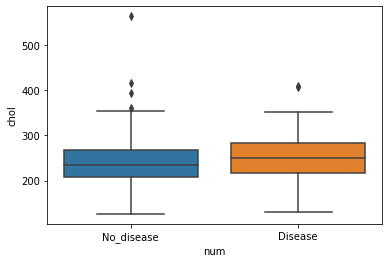

In [32]:
sns.boxplot(x='num', y='chol', data=df)

Remove outliers from continusous attributes as they decrease accuracy

In [33]:
continous_features = ['age','trestbps','chol','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature oldpeak, No of Outliers is 5


In [34]:
outliers(df[continous_features],drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from oldpeak feature removed


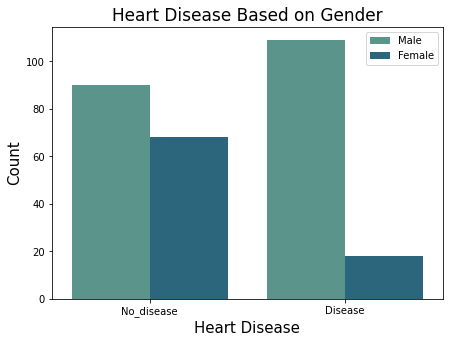

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['num'], hue='sex', data=df, palette='crest')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

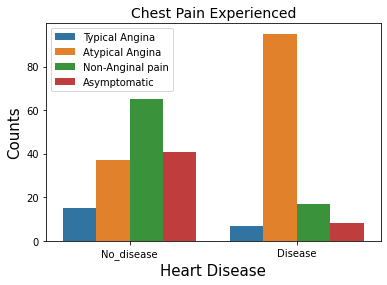

In [36]:
sns.countplot(x=df['num'], hue='cp', data=df)
plt.title('Chest Pain Experienced', fontsize=14)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

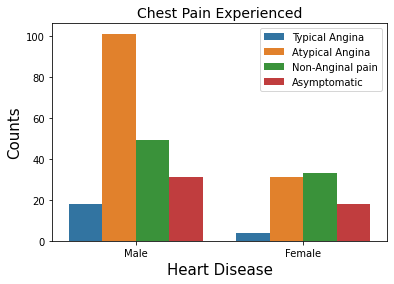

In [37]:
sns.countplot(x=df['sex'], hue='cp', data=df)
plt.title('Chest Pain Experienced', fontsize=14)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

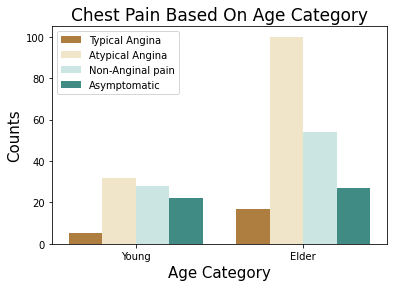

In [38]:
sns.countplot(x=df['Age_Range'], hue='cp', data=df, order=['Young','Elder'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

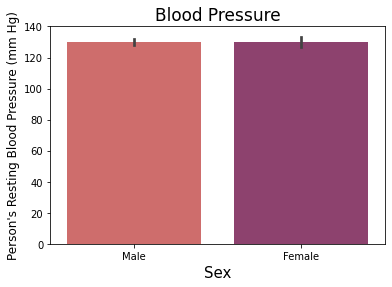

In [39]:
sns.barplot(x='sex', y='trestbps', data=df, palette='flare')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

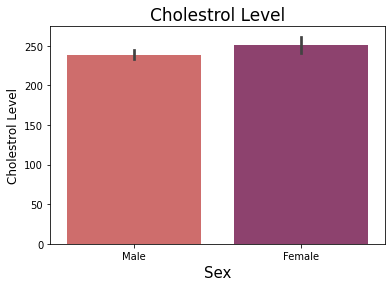

In [40]:
sns.barplot(x='sex', y='chol', data=df, palette='flare')
plt.title("Cholestrol Level", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol Level", fontsize=12)
plt.show()

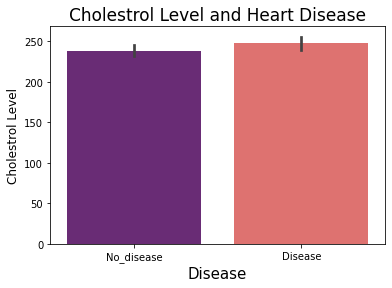

In [41]:
sns.barplot(x='num', y='chol', data=df, palette='magma')
plt.title("Cholestrol Level and Heart Disease", fontsize=17)
plt.xlabel('Disease',fontsize=15)
plt.ylabel("Cholestrol Level", fontsize=12)
plt.show()

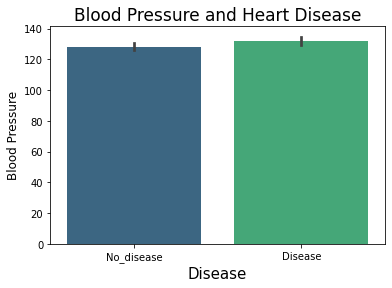

In [42]:
sns.barplot(x='num', y='trestbps', data=df, palette='viridis')
plt.title("Blood Pressure and Heart Disease", fontsize=17)
plt.xlabel('Disease',fontsize=15)
plt.ylabel("Blood Pressure", fontsize=12)
plt.show()

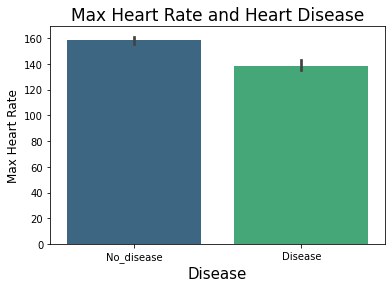

In [43]:
sns.barplot(x='num', y='thalach', data=df, palette='viridis')
plt.title("Max Heart Rate and Heart Disease", fontsize=17)
plt.xlabel('Disease',fontsize=15)
plt.ylabel("Max Heart Rate", fontsize=12)
plt.show()

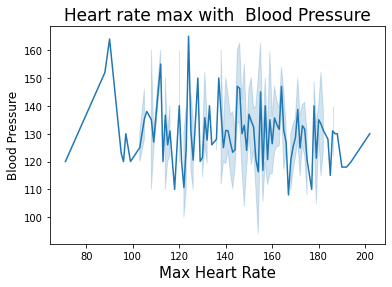

In [44]:
sns.lineplot(x='thalach', y='trestbps', data=df, palette='viridis')
plt.title("Heart rate max with  Blood Pressure", fontsize=17)
plt.xlabel('Max Heart Rate',fontsize=15)
plt.ylabel("Blood Pressure", fontsize=12)
plt.show()

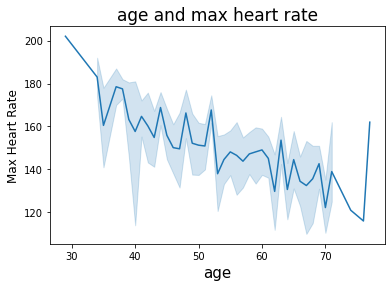

In [45]:
sns.lineplot(x='age', y='thalach', data=df, palette='plasma')
plt.title("age and max heart rate", fontsize=17)
plt.xlabel('age',fontsize=15)
plt.ylabel("Max Heart Rate", fontsize=12)
plt.show()

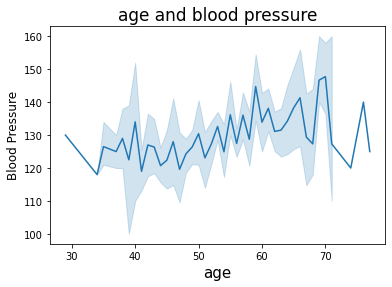

In [46]:
sns.lineplot(x='age', y='trestbps', data=df, palette='plasma')
plt.title("age and blood pressure", fontsize=17)
plt.xlabel('age',fontsize=15)
plt.ylabel("Blood Pressure", fontsize=12)
plt.show()

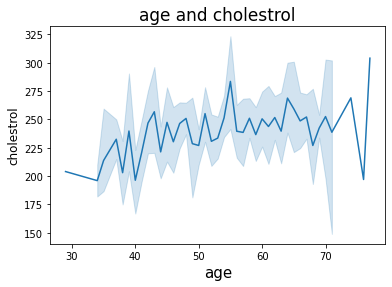

In [47]:
sns.lineplot(x='age', y='chol', data=df, palette='plasma')
plt.title("age and cholestrol", fontsize=17)
plt.xlabel('age',fontsize=15)
plt.ylabel("cholestrol", fontsize=12)
plt.show()

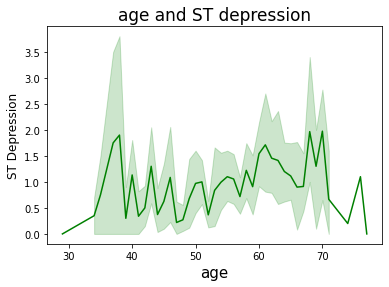

In [48]:
sns.lineplot(x='age', y='oldpeak', data=df, color='g')
plt.title("age and ST depression", fontsize=17)
plt.xlabel('age',fontsize=15)
plt.ylabel("ST Depression", fontsize=12)
plt.show()

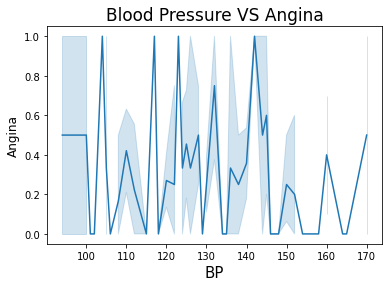

In [49]:
sns.lineplot(x='trestbps', y='exang', data=df, palette='plasma')
plt.title("Blood Pressure VS Angina", fontsize=17)
plt.xlabel('BP',fontsize=15)
plt.ylabel("Angina", fontsize=12)
plt.show()

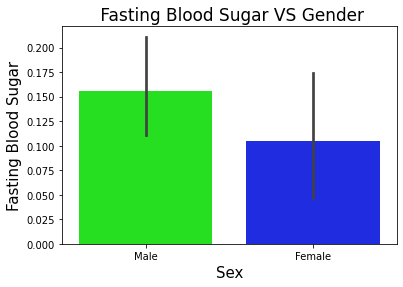

In [50]:
sns.barplot(y='fbs', x='sex', data=df, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

<AxesSubplot:>

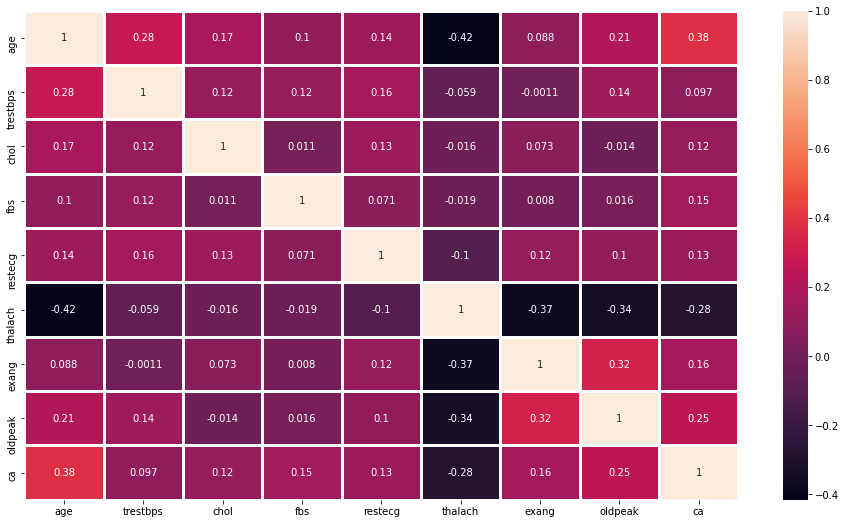

In [51]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, linewidth=3)

FROM ALL THE ABOVE OBSERVATIONS WE CONCLUDE FOLLOWING 

1. It can see that a higher number of men are suffering from Asymptomatic type of Chest Pain.
2. It seems people having asymptomatic chest pain have a higher chance of heart disease.
3. Elder Age People are most affected by Heart Disease compared to young 
4. Blood Pressure Rate is almost equal in Males and Females
5. Females have little bit of higher cholesterol than males
6. Higher Blood Pressure Level results Chances Of Heart Disease
7. It is seen that Blood Pressure and cholestrol increases between age of 50 to 60 and somehow continue the pattern till 70
8. ST increases between the age of 30-40

In [52]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Age_Range
0,63,Male,typical_angina,145,233,1,2,150,0,2.3,downsloping,0.0,6.0,No_disease,Elder
1,67,Male,asymtomatic,160,286,0,2,108,1,1.5,flat,3.0,normal,Disease,Elder
2,67,Male,asymtomatic,120,229,0,2,129,1,2.6,flat,2.0,7.0,Disease,Elder
3,37,Male,non-anginal pain,130,250,0,0,187,0,3.5,downsloping,0.0,normal,No_disease,Young
4,41,Female,atypical_angina,130,204,0,2,172,0,1.4,upsloping,0.0,normal,No_disease,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,Male,typical_angina,110,264,0,0,132,0,1.2,flat,0.0,7.0,Disease,Young
299,68,Male,asymtomatic,144,193,1,0,141,0,3.4,flat,2.0,7.0,Disease,Elder
300,57,Male,asymtomatic,130,131,0,0,115,1,1.2,flat,1.0,7.0,Disease,Elder
301,57,Female,atypical_angina,130,236,0,2,174,0,0.0,flat,1.0,normal,Disease,Elder


In [53]:
df.to_csv(r'C:\Users\jai balaji\Machine Learning INeuron\heart.csv',index=False)